Importing important libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading the data

In [10]:
df= pd.read_csv('titanic.csv')

Understanding the data:
#Shape
#Five rows
#Tail
#Describe
#Missing Data

In [11]:
df.shape

(891, 12)

There are 891 rows and 12 columns in the titanic dataset.

In [12]:
#Five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Those passengers with a 1 survived and those with a 0 under the 'Survived' column died.
The Pclass or passenger class is important because it may indicate survival rate based on class privilleges.
The name of the person  (under Name column) may not provide much information about survival chances but if the name is English, they may have had privilleges during the titanic ages.
The column on sex is categorica data and a string and I may need to convert male and female labels to numeric values. 
The Age column is important as the data is numeric and may be linked to survival chances. 
The SibSp column shows passengers who travelled with their siblings or with their spouses.
The Ticket column does not seem important however, the fare they paid is important because it may indicate their class and therefore linked to their survival.
The Cabin column has null or NAN values and these need to be dealt with in the analysis. 
The Embarked column shiws the city the passengers embarked from.


In [13]:
#Tail
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


The tail end of the data reveals the same information as in the first 5 rows. There are missing data too.

In [14]:
#Describe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The mean age of the passengers was 29.699118 (~30 years) and this could be used to fill the missing data in the Ages column. 
The Parch column shows that the number of passengers who were parents and children ranged from 0 to 6 and most people seem to have travleed alone.

In [15]:
#Null or missing Values
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


The code below generates a heatmap showing missing values in the DataFrame df, with no y-axis tick labels, no color bar, and using the 'virdis' colormap for coloring.

<Axes: >

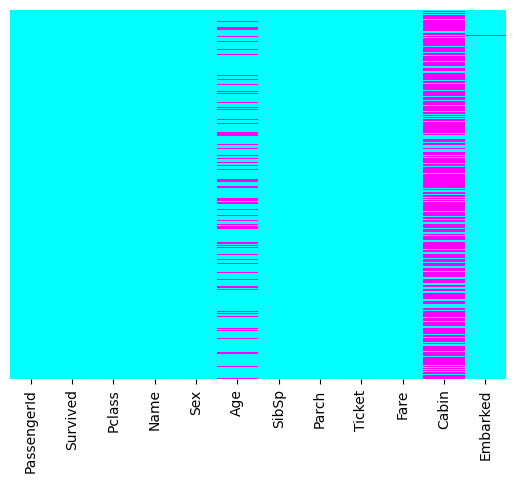

In [26]:
#Visualise null vlaues
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap='cool')

The heatmap above shows there are missing values in the Age and Cabin columns. The Cabin column has far more missing data and it may be worth deleting that column. The statistics below confirm that there are missing values in the Age and Cabin data and with the Cabin missing data of 687 being a lot higher than 177 in the Age column. The proportion of missing data in the Age column is small enough to be replaced by imputation. As mentioned earlier, it may be worth deleting or dropping the Cabin column as it has far too many missing values. 

In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

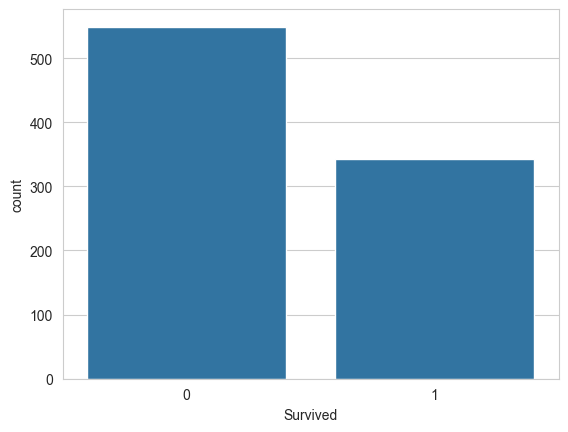

In [28]:
#Visual checks
sns.set_style('whitegrid')
sns.countplot(x='Survived', data =df)

The bar chart above shows that there were more deaths (0) of over 500 than survivors (just above 300).

Inspecting the data further based on how many survived based on their sex.

<Axes: xlabel='Survived', ylabel='count'>

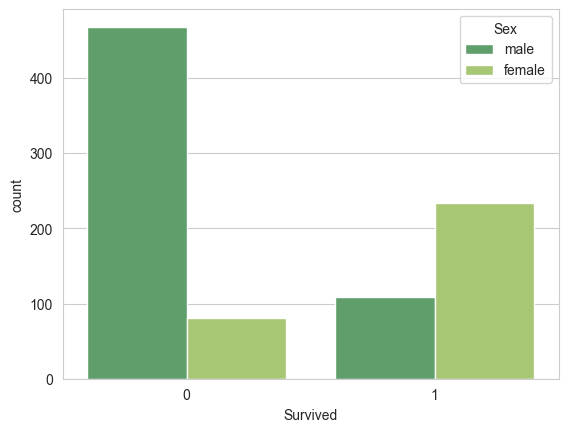

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue= 'Sex', data =df, palette='summer')

The bar chart above shows that there were more male deaths than females. Conversely, there were more female survivors (1) than male survivors (1).